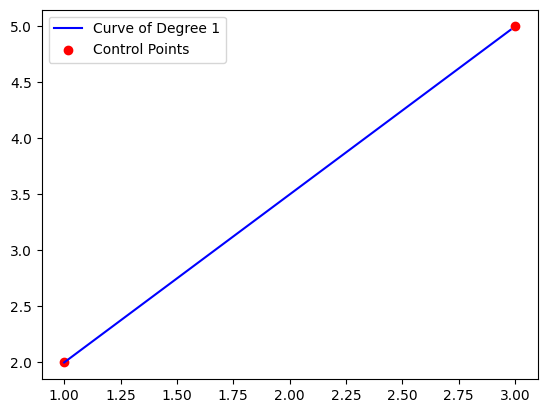

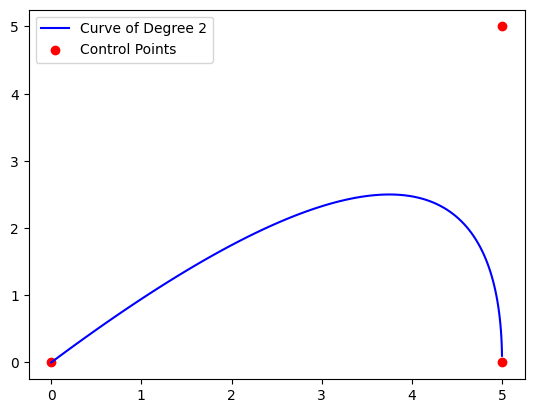

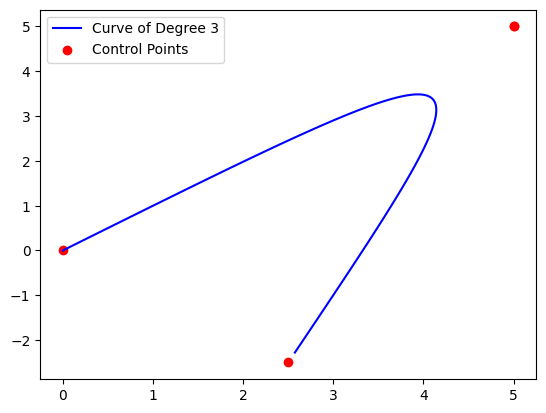

In [2]:
# https://en.wikipedia.org/wiki/B%C3%A9zier_curve
# https://www.tutorialspoint.com/computer_graphics/computer_graphics_curves.htm
 
from typing import List, Tuple
from scipy.special import comb
 
 
class BezierCurve:
    """
    Bezier curve is a weighted sum of a set of control points.
    Generate Bezier curves from a given set of control points.
    This implementation works only for 2d coordinates in the xy plane.
    """
 
    def __init__(self, list_of_points: List[Tuple[float, float]]):
        """
        list_of_points: Control points in the xy plane on which to interpolate. These
            points control the behavior (shape) of the Bezier curve.
        """
        self.list_of_points = list_of_points
        # Degree determines the flexibility of the curve.
        # Degree = 1 will produce a straight line.
        self.degree = len(list_of_points) - 1
 
    def basis_function(self, t: float) -> List[float]:
        """
        The basis function determines the weight of each control point at time t.
            t: time value between 0 and 1 inclusive at which to evaluate the basis of
               the curve.
        returns the x, y values of basis function at time t
 
        >>> curve = BezierCurve([(1,1), (1,2)])
        >>> curve.basis_function(0)
        [1.0, 0.0]
        >>> curve.basis_function(1)
        [0.0, 1.0]
        """
        assert 0 <= t <= 1, "Time t must be between 0 and 1."
        output_values: List[float] = []
        for i in range(len(self.list_of_points)):
            # basis function for each i
            output_values.append(
                comb(self.degree, i) * ((1 - t) ** (self.degree - i)) * (t ** i)
            )
        # the basis must sum up to 1 for it to produce a valid Bezier curve.
        assert round(sum(output_values), 5) == 1
        return output_values
 
    def bezier_curve_function(self, t: float) -> Tuple[float, float]:
        """
        The function to produce the values of the Bezier curve at time t.
            t: the value of time t at which to evaluate the Bezier function
        Returns the x, y coordinates of the Bezier curve at time t.
            The first point in the curve is when t = 0.
            The last point in the curve is when t = 1.
 
        >>> curve = BezierCurve([(1,1), (1,2)])
        >>> curve.bezier_curve_function(0)
        (1.0, 1.0)
        >>> curve.bezier_curve_function(1)
        (1.0, 2.0)
        """
 
        assert 0 <= t <= 1, "Time t must be between 0 and 1."
 
        basis_function = self.basis_function(t)
        x = 0.0
        y = 0.0
        for i in range(len(self.list_of_points)):
            # For all points, sum up the product of i-th basis function and i-th point.
            x += basis_function[i] * self.list_of_points[i][0]
            y += basis_function[i] * self.list_of_points[i][1]
        return (x, y)
 
    def plot_curve(self, step_size: float = 0.01):
        """
        Plots the Bezier curve using matplotlib plotting capabilities.
            step_size: defines the step(s) at which to evaluate the Bezier curve.
            The smaller the step size, the finer the curve produced.
        """
        import matplotlib.pyplot as plt
 
        to_plot_x: List[float] = []  # x coordinates of points to plot
        to_plot_y: List[float] = []  # y coordinates of points to plot
 
        t = 0.0
        while t <= 1:
            value = self.bezier_curve_function(t)
            to_plot_x.append(value[0])
            to_plot_y.append(value[1])
            t += step_size
 
        x = [i[0] for i in self.list_of_points]
        y = [i[1] for i in self.list_of_points]
 
        plt.plot(
            to_plot_x,
            to_plot_y,
            color="blue",
            label="Curve of Degree " + str(self.degree),
        )
        plt.scatter(x, y, color="red", label="Control Points")
        plt.legend()
        plt.show()
 
 
if __name__ == "__main__":
    import doctest
 
    doctest.testmod()
 
    BezierCurve([(1, 2), (3, 5)]).plot_curve()  # degree 1
    BezierCurve([(0, 0), (5, 5), (5, 0)]).plot_curve()  # degree 2
    BezierCurve([(0, 0), (5, 5), (5, 0), (2.5, -2.5)]).plot_curve()  # degree 3